In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [13]:
# Constants and Dummy Data
NUM_OF_FEATURES = 7
min_ssim_score_list = [0.4, 0.4, 0.5, 0.4, 0.5, 0.45, 0.5]
avg_ssim_list = [0.6, 0.5, 0.7, 0.8, 0.9, 0.6, 0.5]
best_extracted_img_list = [(None, 0.8) for _ in range(NUM_OF_FEATURES)]
left_BL_result = (None, 5)  # Placeholder for left bleed line analysis
right_BL_result = (None, 5)  # Placeholder for right bleed line analysis

In [14]:
path = "D:/1.project_dip/Dataset/500_dataset/500_s10.jpg"

In [15]:
# Pre- processing

# Reading the image
test_img = cv2.imread(path)
# Resizing the image
test_img = cv2.resize(test_img, (1167, 519))

# Guassian Blur
blur_test_img = cv2.GaussianBlur(test_img, (5,5), 0)

# Grayscale conversion
gray_test_image = cv2.cvtColor(blur_test_img, cv2.COLOR_BGR2GRAY)
print(gray_test_image.shape[0])

def preprocessing():
    # Showing original currency note
    plt.imshow(gray_test_image, 'gray')
    plt.title('Input image after pre- processing')
    plt.show()


519


In [16]:
#  Calculating SSIM of the two images sent as parameters

def calculateSSIM(template_img, query_img):
    min_w = min(template_img.shape[1], query_img.shape[1])
    min_h = min(template_img.shape[0], query_img.shape[0])
    
    # Resizing the two images so that both have same dimensions
    img1 = cv2.resize(template_img, (min_w, min_h))
    img2 = cv2.resize(query_img, (min_w, min_h))
    
    # Conversion to gray- scale
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Plotting the images
    plt.subplot(1, 2, 1)
    plt.imshow(img1, 'gray')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, 'gray')

    plt.show()
    
    # Find the SSIM score and return
    score = ssim(img1, img2)
    return score

In [17]:
# Feature detection using ORB

def computeORB(template_img, query_img):
    # ===================== Creating orb object ==============================

    nfeatures=700;
    scaleFactor=1.2;
    nlevels=8;
    edgeThreshold=15; 

    # Initialize the ORB detector algorithm 
    orb = cv2.ORB_create(
        nfeatures,
        scaleFactor,
        nlevels,
        edgeThreshold)
    
    # Find the keypoints and descriptors with ORB
    # This will find the keypoints of each of the image and then find the descriptors corresponding to each keypoint.
    
    kpts1, descs1 = orb.detectAndCompute(template_img,None)
    kpts2, descs2 = orb.detectAndCompute(query_img,None)
    
    # ====================================== Brute Force Matching ==============================
    # Starting a brute force matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Finding matches between the 2 descrptor sets
    matches = bf.match(descs1, descs2)

    # sort the matches in the order of their distance
    # Lower the distance, better the matching
    dmatches = sorted(matches, key = lambda x:x.distance)

   
    # ======================================= Image homography ================================
    ## extract the matched keypoints
    src_pts  = np.float32([kpts1[m.queryIdx].pt for m in dmatches]).reshape(-1,1,2)
    dst_pts  = np.float32([kpts2[m.trainIdx].pt for m in dmatches]).reshape(-1,1,2)

    ## find homography matrix and do perspective transform
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    h,w = template_img.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    
    if M is not None:
        dst = cv2.perspectiveTransform(pts,M)
    else:
        dst = None

    # This finds the template region in the test currency note
   
    # Returning necessary data
    return dst, dst_pts, kpts1, kpts2, dmatches


ANALYSIS OF FEATURE 1
---> Template 1 :


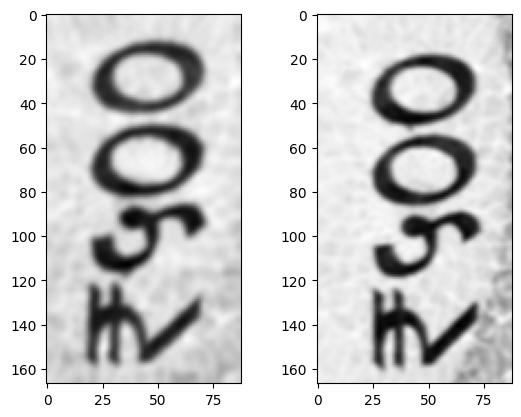

SSIM score: 0.3144480330346657
---> Template 2 :


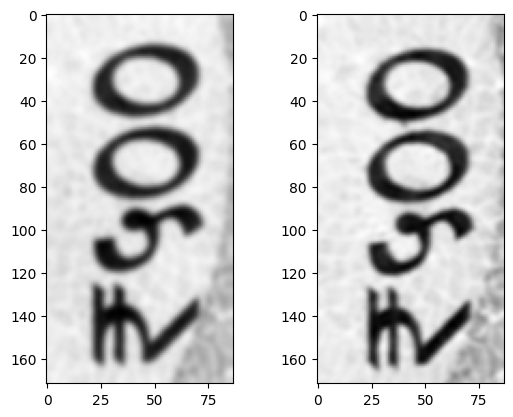

SSIM score: 0.7390933600871612
---> Template 3 :


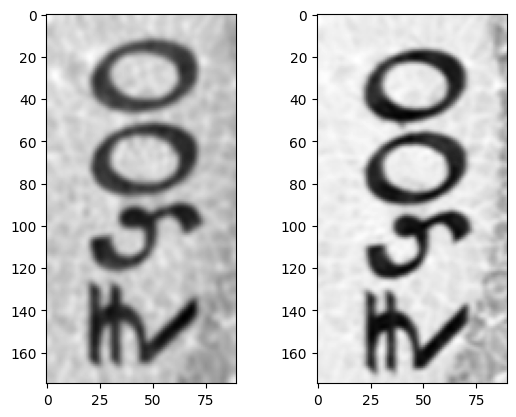

SSIM score: 0.44975361698617633
---> Template 4 :


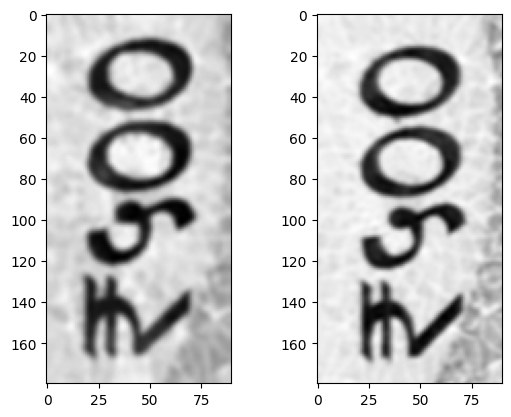

SSIM score: 0.6014227616361387
---> Template 5 :
Template discarded - Area of extracted feature is outside the permitted range!
---> Template 6 :


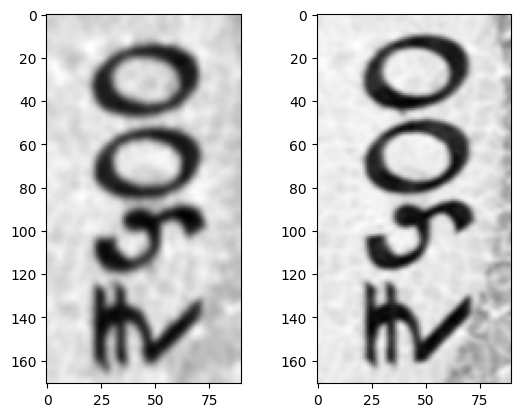

SSIM score: 0.5745404610164863
SSIM score set of Feature 1: [0.3144480330346657, 0.7390933600871612, 0.44975361698617633, 0.6014227616361387, 0.5745404610164863]
Average SSIM of Feature 1: 0.5358516465521257

ANALYSIS OF FEATURE 2
---> Template 1 :


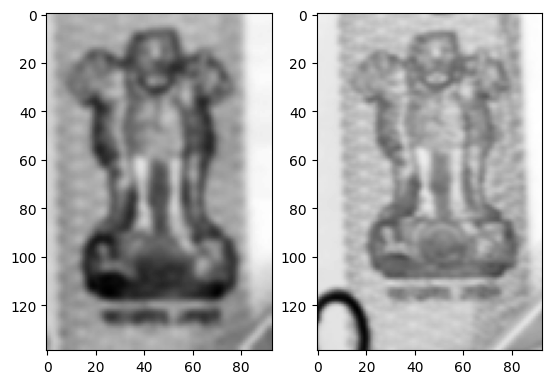

SSIM score: 0.22349346257918518
---> Template 2 :


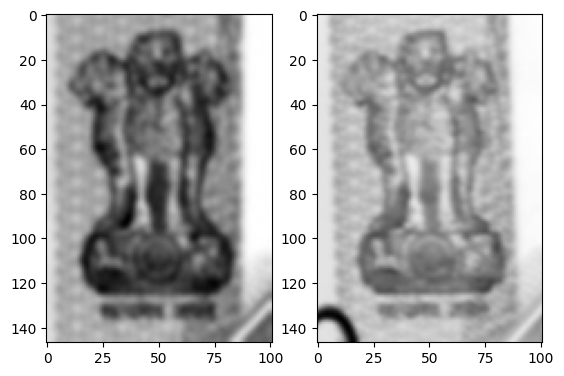

SSIM score: 0.7546104213482555
---> Template 3 :


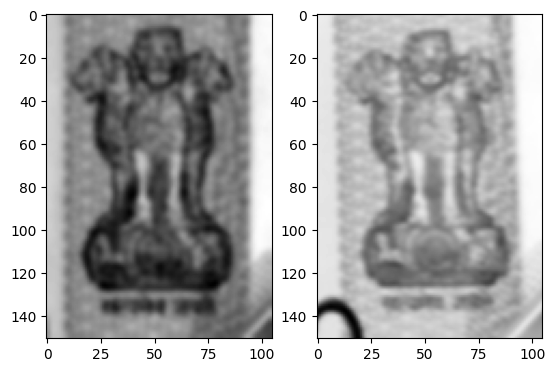

SSIM score: 0.5641652781007702
---> Template 4 :
Template discarded - Area of extracted feature is outside the permitted range!
---> Template 5 :
Template discarded - Area of extracted feature is outside the permitted range!
---> Template 6 :
Template discarded - Area of extracted feature is outside the permitted range!
SSIM score set of Feature 2: [0.22349346257918518, 0.7546104213482555, 0.5641652781007702]
Average SSIM of Feature 2: 0.5140897206760703

ANALYSIS OF FEATURE 3
---> Template 1 :


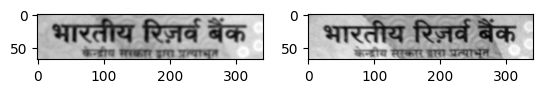

SSIM score: 0.7670440585505354
---> Template 2 :


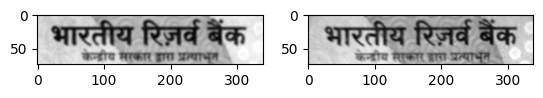

SSIM score: 0.6618560754267963
---> Template 3 :


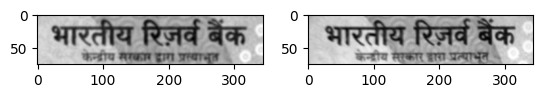

SSIM score: 0.5832913839958459
---> Template 4 :
Template discarded - Area of extracted feature is outside the permitted range!
---> Template 5 :


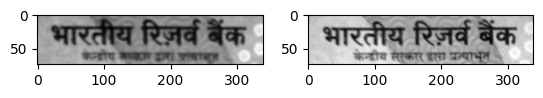

SSIM score: 0.6600474358932835
---> Template 6 :


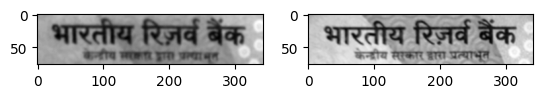

SSIM score: 0.6314627774439802
SSIM score set of Feature 3: [0.7670440585505354, 0.6618560754267963, 0.5832913839958459, 0.6600474358932835, 0.6314627774439802]
Average SSIM of Feature 3: 0.6607403462620882

ANALYSIS OF FEATURE 4
---> Template 1 :


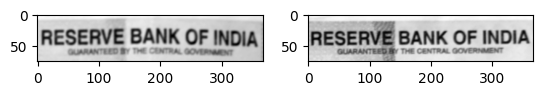

SSIM score: 0.431564551179368
---> Template 2 :


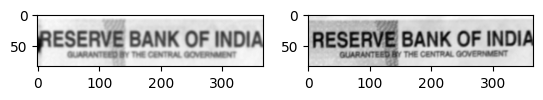

SSIM score: 0.665216208125528
---> Template 3 :


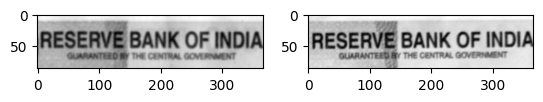

SSIM score: 0.7889070026960466
---> Template 4 :


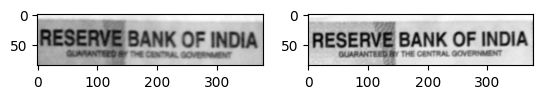

SSIM score: 0.6209368077623765
---> Template 5 :


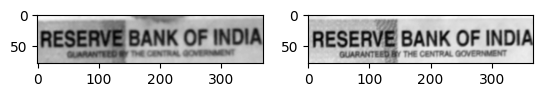

SSIM score: 0.5972764934745003
---> Template 6 :


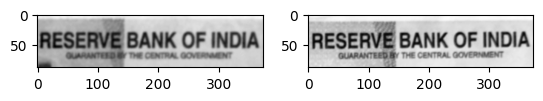

SSIM score: 0.6639942495731468
SSIM score set of Feature 4: [0.431564551179368, 0.665216208125528, 0.7889070026960466, 0.6209368077623765, 0.5972764934745003, 0.6639942495731468]
Average SSIM of Feature 4: 0.6279825521351611

ANALYSIS OF FEATURE 5
---> Template 1 :


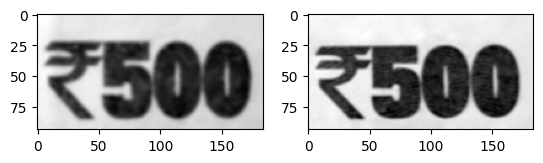

SSIM score: 0.7166252716930384
---> Template 2 :


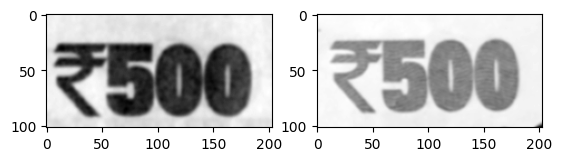

SSIM score: 0.6048400893648784
---> Template 3 :


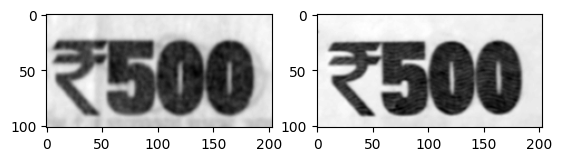

SSIM score: 0.7482387428834071
---> Template 4 :


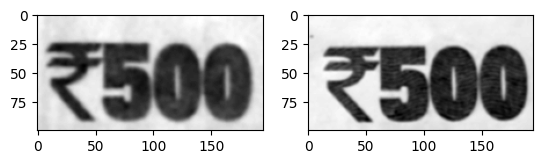

SSIM score: 0.5652365727450084
---> Template 5 :


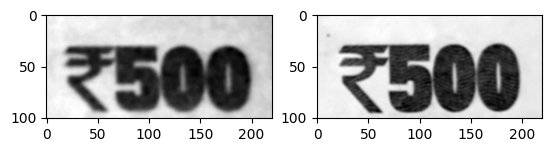

SSIM score: 0.7926092570887434
---> Template 6 :


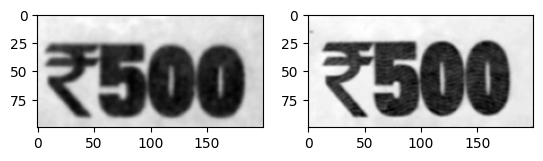

SSIM score: 0.7077688304927708
SSIM score set of Feature 5: [0.7166252716930384, 0.6048400893648784, 0.7482387428834071, 0.5652365727450084, 0.7926092570887434, 0.7077688304927708]
Average SSIM of Feature 5: 0.6892197940446411

ANALYSIS OF FEATURE 6
---> Template 1 :


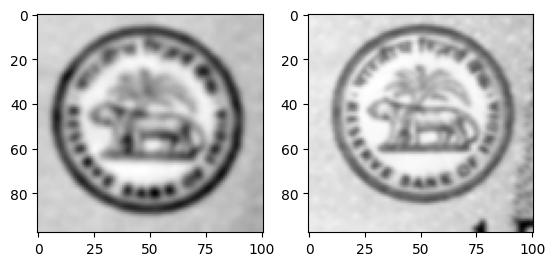

SSIM score: 0.3201048307702183
---> Template 2 :


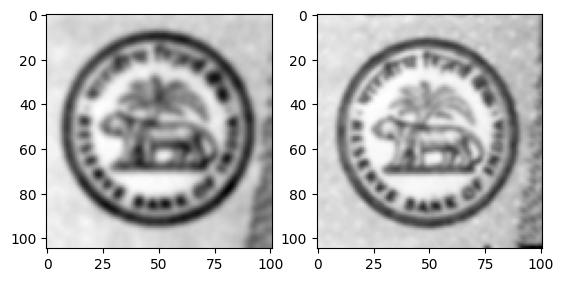

SSIM score: 0.5373980140686844
---> Template 3 :


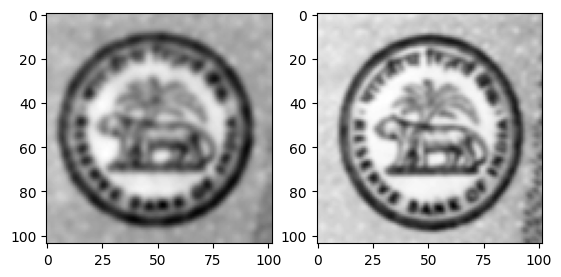

SSIM score: 0.5243205005169356
---> Template 4 :


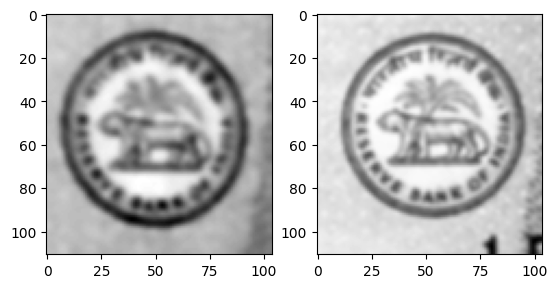

SSIM score: 0.332789847440693
---> Template 5 :
Template discarded - Area of extracted feature is outside the permitted range!
---> Template 6 :
Template discarded - Area of extracted feature is outside the permitted range!
SSIM score set of Feature 6: [0.3201048307702183, 0.5373980140686844, 0.5243205005169356, 0.332789847440693]
Average SSIM of Feature 6: 0.4286532981991328

ANALYSIS OF FEATURE 7
---> Template 1 :


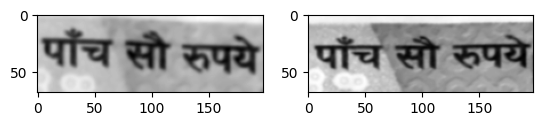

SSIM score: 0.5213520027777658
---> Template 2 :


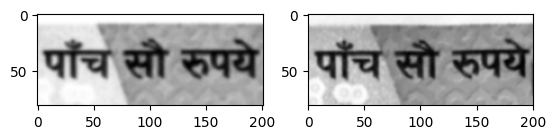

SSIM score: 0.8438220251061854
---> Template 3 :


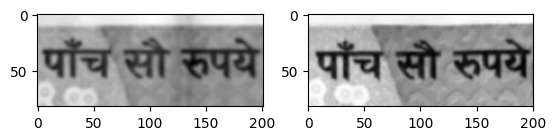

SSIM score: 0.7334514881511721
---> Template 4 :


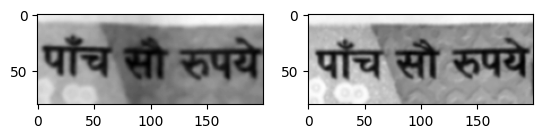

SSIM score: 0.6445105673659487
---> Template 5 :


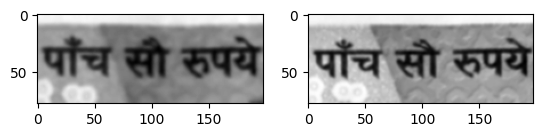

SSIM score: 0.6989284227385619
---> Template 6 :


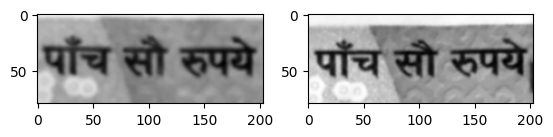

SSIM score: 0.5551402822178161
SSIM score set of Feature 7: [0.5213520027777658, 0.8438220251061854, 0.7334514881511721, 0.6445105673659487, 0.6989284227385619, 0.5551402822178161]
Average SSIM of Feature 7: 0.666200798059575

Final Score-Set List:
Feature 1: [0.3144480330346657, 0.7390933600871612, 0.44975361698617633, 0.6014227616361387, 0.5745404610164863]
Feature 2: [0.22349346257918518, 0.7546104213482555, 0.5641652781007702]
Feature 3: [0.7670440585505354, 0.6618560754267963, 0.5832913839958459, 0.6600474358932835, 0.6314627774439802]
Feature 4: [0.431564551179368, 0.665216208125528, 0.7889070026960466, 0.6209368077623765, 0.5972764934745003, 0.6639942495731468]
Feature 5: [0.7166252716930384, 0.6048400893648784, 0.7482387428834071, 0.5652365727450084, 0.7926092570887434, 0.7077688304927708]
Feature 6: [0.3201048307702183, 0.5373980140686844, 0.5243205005169356, 0.332789847440693]
Feature 7: [0.5213520027777658, 0.8438220251061854, 0.7334514881511721, 0.6445105673659487, 0.698928

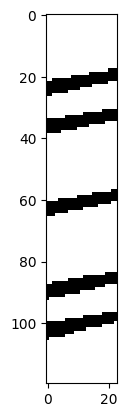

Number of black regions found in each column:
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5

Average number of black regions is: 5.0

ANALYSIS OF FEATURE 9 : RIGHT BLEED LINES



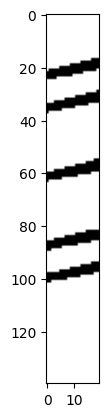

Number of black regions found in each column:
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5

Average number of black regions is: 5.0


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Values for specifying search area of features 1 to 7

search_area_list = [[200,300,200,370],
                    [1050,1500,300,450],
                    [100,450,20,120],
                    [690,1050,20,120],
                    [820,1050,350,430],
                    [700,810,330,430],
                    [400,650,0,100]]

# Values of max_area and min_area for each feature for features 1 to 7

feature_area_limits_list = [[12000,17000],
                            [10000,18000],
                            [20000,30000],
                            [24000,36000],
                            [15000,25000],
                            [7000,13000],
                            [11000,18000]]

# Results for each feature
left_BL_result = []
right_BL_result = []
result_list = []

# Algorithm: Verification of features 1 to 7
def testFeature_1_2_7():
    i = 0
    NUMBER_OF_TEMPLATES = 6
    NUM_OF_FEATURES = 7
    score_set_list = []           # Stores the SSIM score set of each feature
    best_extracted_img_list = []  # Stores the extracted image with the highest SSIM score for each feature
    avg_ssim_list = []            # Stores the average SSIM value for each feature

    # Iterating for each feature
    for j in range(NUM_OF_FEATURES):
        print(f'\nANALYSIS OF FEATURE {j + 1}')

        score_set = []           # SSIM scores for each template of the current feature
        max_score = -1           # Stores max SSIM score
        max_score_img = None     # Stores extracted image with max SSIM score for the current feature

        # Perform feature detection, extraction, and comparison for each template stored in the dataset
        for i in range(NUMBER_OF_TEMPLATES):
            print(f'---> Template {i + 1} :')

            # Current template
            template_path = f'Dataset/500_Features Dataset/Feature {j + 1}/{i + 1}.jpg'
            template_img = cv2.imread(template_path)

            template_img_blur = cv2.GaussianBlur(template_img, (5, 5), 0)
            template_img_gray = cv2.cvtColor(template_img_blur, cv2.COLOR_BGR2GRAY)

            test_img_mask = gray_test_image.copy()

            # Creating a mask to search for the current template
            search_area = search_area_list[j]

            test_img_mask[:, :search_area[0]] = 0
            test_img_mask[:, search_area[1]:] = 0
            test_img_mask[:search_area[2], :] = 0
            test_img_mask[search_area[3]:, :] = 0

            # Feature detection using ORB
            dst, dst_pts, kpts1, kpts2, dmatches = computeORB(template_img_gray, test_img_mask)

            # Error handling
            if dst is None:
                print('An error occurred - Homography matrix is of NoneType')
                continue

            # Find the details of a bounding rectangle that bounds the detected feature
            (x, y, w, h) = cv2.boundingRect(dst)

            # Checking if the area of the detected region is within the min and max area allowed for the current feature
            min_area = feature_area_limits_list[j][0]
            max_area = feature_area_limits_list[j][1]

            feature_area = w * h
            if feature_area < min_area or feature_area > max_area:
                (x, y, w, h) = cv2.boundingRect(dst_pts)  # Recalculate the rectangle

                feature_area = w * h
                if feature_area < min_area or feature_area > max_area:
                    print('Template discarded - Area of extracted feature is outside the permitted range!')
                    continue

            # Crop the region inside the bounding rectangle (matched region)
            crop_img = blur_test_img[y:y + h, x:x + w]

            # SSIM calculation
            score = calculateSSIM(template_img_blur, crop_img)
            score_set.append(score)
            print(f'SSIM score: {score}')

            # Keep details about the extracted region with the highest SSIM score
            if score > max_score:
                max_score = score
                max_score_img = crop_img

        # Storing necessary data
        score_set_list.append(score_set)
        print(f'SSIM score set of Feature {j + 1}: {score_set}')

        if len(score_set) != 0:
            avg_ssim = sum(score_set) / len(score_set)
            avg_ssim_list.append(avg_ssim)
            print(f'Average SSIM of Feature {j + 1}: {avg_ssim}')
        else:
            print(f'No SSIM scores were found for Feature {j + 1}!')
            avg_ssim_list.append(0.0)

        best_extracted_img_list.append([max_score_img, max_score])
    

    # Printing all details for features 1-7
    print('\nFinal Score-Set List:')
    for x in range(len(score_set_list)):
        print(f'Feature {x + 1}: {score_set_list[x]}')

    print('\nFinal Average SSIM List for Each Feature:')
    for x in range(len(avg_ssim_list)):
        print(f'Feature {x + 1}: {avg_ssim_list[x]}')


# Function to test Feature 8: Left Bleed Lines
def testFeature_8():
    print('\nANALYSIS OF FEATURE 8 : LEFT BLEED LINES\n')

    crop = test_img[120:240, 12:35]
    img = crop.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)

    plt.imshow(thresh, 'gray')
    plt.show()

    whitePixelValue = 255
    blackPixelValue = 0
    width = thresh.shape[1]
    result = []
    num_of_cols = 0

    print('Number of black regions found in each column:')
    for j in range(width):
        col = thresh[:, j:j+1]
        count = 0
        for i in range(len(col) - 1):
            pixel1_value = col[i][0]
            pixel2_value = col[i + 1][0]
            if pixel1_value not in [0, 255]:
                pixel1_value = 255
            if pixel2_value not in [0, 255]:
                pixel2_value = 255
            if pixel1_value == whitePixelValue and pixel2_value == blackPixelValue:
                count += 1
        if count > 0 and count < 10:
            print(count)
            result.append(count)
            num_of_cols += 1
        else:
            print(count, 'Erroneous -> discarded')

    if num_of_cols != 0:
        average_count = sum(result) / num_of_cols
    else:
        average_count = -1
        print('Error occurred- Division by 0')

    print('\nAverage number of black regions is:', average_count)
    global left_BL_result
    left_BL_result = [thresh, average_count]

# Function to test Feature 9: Right Bleed Lines
def testFeature_9():
    print('\nANALYSIS OF FEATURE 9 : RIGHT BLEED LINES\n')

    crop = test_img[120:260, 1135:1155]
    img = crop.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)

    plt.imshow(thresh, 'gray')
    plt.show()

    whitePixelValue = 255
    blackPixelValue = 0
    width = thresh.shape[1]
    result = []
    num_of_cols = 0

    print('Number of black regions found in each column:')
    for j in range(width):
        col = thresh[:, j:j+1]
        count = 0
        for i in range(len(col) - 1):
            pixel1_value = col[i][0]
            pixel2_value = col[i + 1][0]  
            if pixel1_value not in [0, 255]:
                pixel1_value = 255
            if pixel2_value not in [0, 255]:
                pixel2_value = 255
            if pixel1_value == whitePixelValue and pixel2_value == blackPixelValue:
                count += 1
        if count > 0 and count < 10:
            print(count)
            result.append(count)
            num_of_cols += 1
        else:
            print(count, 'Erroneous -> discarded')

    if num_of_cols != 0:
        average_count = sum(result) / num_of_cols
    else:
        average_count = -1
        print('Error occurred- Division by 0')

    print('\nAverage number of black regions is:', average_count)
    global right_BL_result
    right_BL_result = [thresh, average_count]
    

# Main function to run all tests
def main():
    testFeature_1_2_7()
    testFeature_8()
    testFeature_9()

if __name__ == "__main__":
    main()


In [19]:
def analyze_results(avg_ssim_list, best_extracted_img_list, left_BL_result, right_BL_result):
    """
    Analyze the results of all features and determine if the currency note is real or fake.
    """
    print("\nRESULT ANALYSIS\n")
    successful_features_count = 0

    # Analyze Features 1–7
    for i in range(NUM_OF_FEATURES):
        avg_score = avg_ssim_list[i]
        _, max_score = best_extracted_img_list[i]
        min_allowed_score = min_ssim_score_list[i]

        if avg_score >= min_allowed_score or max_score >= 0.79:
            successful_features_count += 1
            print(f"Feature {i + 1}: Successful")
        else:
            print(f"Feature {i + 1}: Unsuccessful")

    # Analyze Feature 8 (Left Bleed Lines)
    if len(left_BL_result) == 2:
        _, left_line_count = left_BL_result
        if 4.7 <= left_line_count <= 5.6:
            successful_features_count += 1
            print("Feature 8: Successful - Left bleed lines detected")
        else:
            print("Feature 8: Unsuccessful")
    else:
        print("Feature 8: Unsuccessful - No valid results")

    # Analyze Feature 9 (Right Bleed Lines)
    if len(right_BL_result) == 2:
        _, right_line_count = right_BL_result
        if 4.7 <= right_line_count <= 5.6:
            successful_features_count += 1
            print("Feature 9: Successful - Right bleed lines detected")
        else:
            print("Feature 9: Unsuccessful")
    else:
        print("Feature 9: Unsuccessful - No valid results")


    # Final Decision
    print("\nResult Summary:")
    print(f"{successful_features_count} out of 9 features are VERIFIED!")
    if successful_features_count == 9:
        print("Final Verdict: The currency note is REAL.")
    else:
        print("Final Verdict: The currency note is FAKE.")

In [20]:
# Main Function
def main(image_path):
    """
    Main function to execute the fake currency detection workflow.
    :param image_path: Path to the input currency image
    """
    try:
        gray_image = preprocessing()
        analyze_results(avg_ssim_list, best_extracted_img_list, left_BL_result, right_BL_result)
    except Exception as e:
        print(f"An error occurred: {e}")

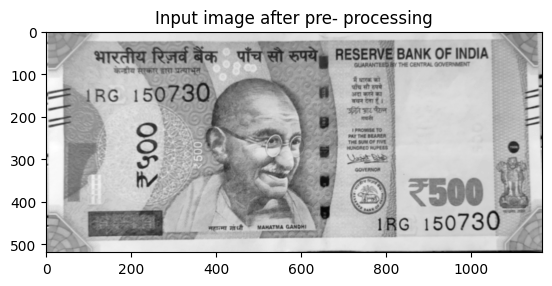


RESULT ANALYSIS

Feature 1: Successful
Feature 2: Successful
Feature 3: Successful
Feature 4: Successful
Feature 5: Successful
Feature 6: Successful
Feature 7: Successful
Feature 8: Successful - Left bleed lines detected
Feature 9: Successful - Right bleed lines detected

Result Summary:
9 out of 9 features are VERIFIED!
Final Verdict: The currency note is REAL.


In [21]:
if __name__ == "__main__":
    image_path = "D:/1.project_dip/Dataset/500_dataset/500_s10.jpg"  # Replace with the actual image path
    main(image_path)